In [1]:
import numpy as np
from matplotlib import pyplot as plt
from experiments.evaluation_flow.shared import GOOGLENET, RESNET_152, MOBILENET, RESNET_18, RESNET_50
from experiments.plots.util import *
import numpy as np

In [2]:
# define the directory containing the experiment logs
BASELINE = 'baseline'
PARAM_UPDATE = 'param_update'
PARAM_UPDATE_IMPROVED = 'param_update_improved'
PROVENANCE = 'provenance'

VERSION = 'version'
FINE_TUNED = 'fine-tuned'

ROOT_LOG_DIR = '../evaluation_flow/evaluation-flow-results/results'

In [3]:
# the storage consumption is determined on the server -> filter files that are server logs
all_files = all_files_in_dir(ROOT_LOG_DIR)
server_files = [f for f in all_files if 'server' in f]

In [4]:
U_IDS = 'u_ids'
# for all files extract the metadata (e.g. what model and dataset is used)
server_files_and_meta = [(extract_file_meta(f), f) for f in server_files]
# add a mapping: use_case -> model id
server_files_and_meta = [({**f[0], **{U_IDS: use_case_ids(f[1])}}, f[1]) for f in server_files_and_meta]

In [5]:
# add the total storage consumption, and the detailed storage consumption to the metadata
# and save all metadata as a list in the variable storage_meta
storage_meta = []
for f in server_files_and_meta:
    use_case_id_dict = f[0][U_IDS]
    consumptions = {}
    total_consumptions = {}
    for use_case in use_case_id_dict.keys():
        s_info = storage_info(f[1], use_case_id_dict[use_case])
        consumptions[use_case] = s_info
        total_consumptions[use_case] = total_storage_consumption(s_info)

    f[0].update({CONSUMPTIONS: consumptions, TOTAL_CONSUMPTIONS: total_consumptions})
    storage_meta.append(f[0])

In [6]:
# helper function to filer metadata
def filter_meta(to_filter, model=None, approach=None, snapshot_type=None, snapshot_dist=None, run=None):
    result = [f for f in to_filter]
    if model:
        result = [f for f in result if f[MODEL] == model]
    if approach:
        result = [f for f in result if f[APPROACH] == approach]
    if snapshot_type:
        result = [f for f in result if f[SNAPSHOT_TYPE] == snapshot_type]
    if snapshot_dist:
        result = [f for f in result if f[SNAPSHOT_DIST] == snapshot_dist]
    if run:
        result = [f for f in result if f[RUN] == run]

    return result

In [7]:
def plot_single_storage_consumption(meta, save_path=None, ignore_use_cases=[]):
    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    cons = meta[TOTAL_CONSUMPTIONS]
    for uc in ignore_use_cases:
        del cons[uc]
    use_cases = list(cons.keys())
    values = [c * 10 ** -6 for c in list(cons.values())]  # byte -> Mb
    ax.bar(use_cases, values)
    ax.set_ylabel('Storage consumption in Mb')
    ax.set_xlabel('Use case')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()

    print(cons)


def plot_median_storage_consumption(metas, save_path=None, ignore_use_cases=[]):
    agg = aggregate_total_storage_consumption(metas, aggregate='median')
    plot_single_storage_consumption(agg, save_path, ignore_use_cases)

In [8]:
#################################
# Plots for baseline approach
#################################

In [9]:
#################################
# Storage consumption is independent of use case
# Only exception is U1 vs all other ruse cases:
# For U1 we save no base model reference, for all other we do
#################################

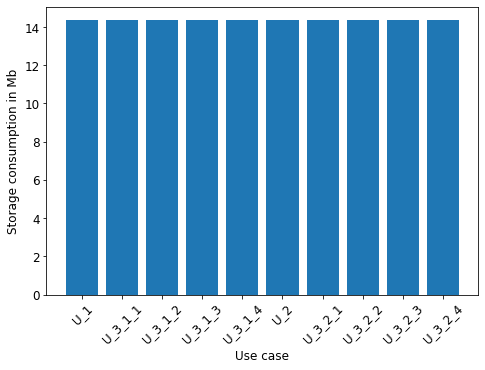

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [10]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-mobilenet-version-food.pdf')

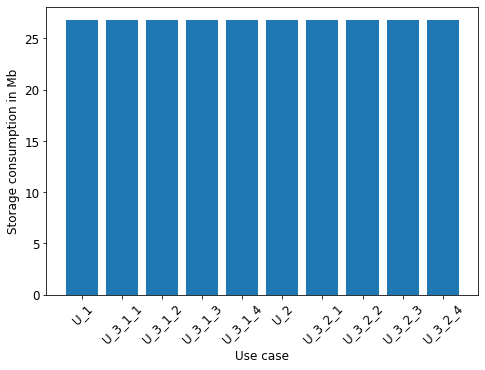

{'U_1': 26769975.0, 'U_3_1_1': 26770018.0, 'U_3_1_2': 26770018.0, 'U_3_1_3': 26770018.0, 'U_3_1_4': 26770018.0, 'U_2': 26770018.0, 'U_3_2_1': 26770018.0, 'U_3_2_2': 26770018.0, 'U_3_2_3': 26770018.0, 'U_3_2_4': 26770018.0}


In [11]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-googlenet-version-food.pdf')

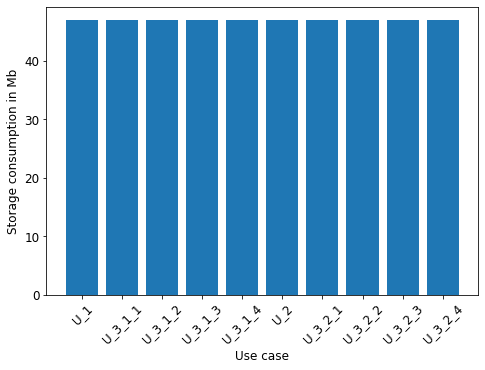

{'U_1': 46873903.0, 'U_3_1_1': 46873946.0, 'U_3_1_2': 46873946.0, 'U_3_1_3': 46873946.0, 'U_3_1_4': 46873946.0, 'U_2': 46873946.0, 'U_3_2_1': 46873946.0, 'U_3_2_2': 46873946.0, 'U_3_2_3': 46873946.0, 'U_3_2_4': 46873946.0}


In [12]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet18-version-food.pdf')

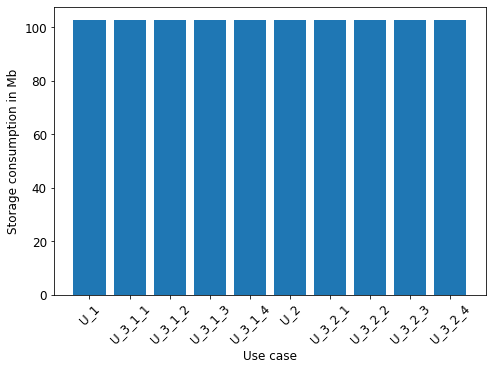

{'U_1': 102627679.0, 'U_3_1_1': 102627722.0, 'U_3_1_2': 102627722.0, 'U_3_1_3': 102627722.0, 'U_3_1_4': 102627722.0, 'U_2': 102627722.0, 'U_3_2_1': 102627722.0, 'U_3_2_2': 102627722.0, 'U_3_2_3': 102627722.0, 'U_3_2_4': 102627722.0}


In [13]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet50-version-food.pdf')

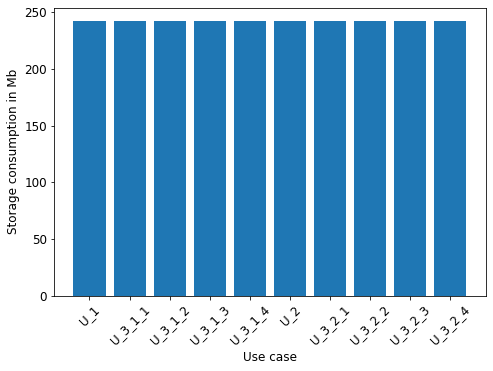

{'U_1': 241902565.0, 'U_3_1_1': 241902608.0, 'U_3_1_2': 241902608.0, 'U_3_1_3': 241902608.0, 'U_3_1_4': 241902608.0, 'U_2': 241902608.0, 'U_3_2_1': 241902608.0, 'U_3_2_2': 241902608.0, 'U_3_2_3': 241902608.0, 'U_3_2_4': 241902608.0}


In [14]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet152-version-food.pdf')

In [15]:
#################################
# Storage consumption is only dependent on the used model
# To show: plot mobilenet storage consumptions with different snapshot_type and snapshot_dist
#################################

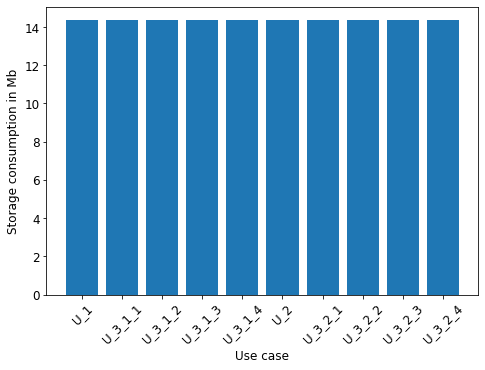

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [16]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-mobilenet-version-food.pdf')

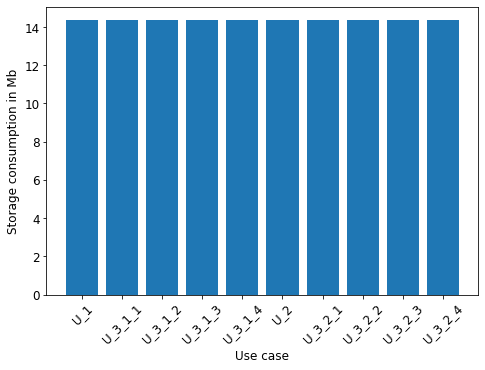

{'U_1': 14345728.0, 'U_3_1_1': 14345771.0, 'U_3_1_2': 14345771.0, 'U_3_1_3': 14345771.0, 'U_3_1_4': 14345771.0, 'U_2': 14345771.0, 'U_3_2_1': 14345771.0, 'U_3_2_2': 14345771.0, 'U_3_2_3': 14345771.0, 'U_3_2_4': 14345771.0}


In [17]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type='fine-tuned', snapshot_dist='outdoor')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-mobilenet-version-food.pdf')

In [18]:
#################################
# Analyse the distribution of the consumed storage
#################################
meta = filter_meta(storage_meta, model=MOBILENET, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')[0]
u_1_storage_consumption = meta[CONSUMPTIONS][U_1]
flat = flatten_dict(u_1_storage_consumption)
meta_params = split_in_params_and_rest(flat)

# meta_code_params['code'] = 100000

meta_code_params_dict = {BASELINE: meta_params, 'baseline2': meta_params}

In [19]:
def plot_abs_storage_dist(_meta_code_params_dict, save_path=None):


    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(4)

    approaches = list(_meta_code_params_dict.keys())
    labels = list(list(_meta_code_params_dict.values())[0].keys())
    data = [list(mcp.values()) for mcp in _meta_code_params_dict.values()]


    pos = range(len(approaches))

    prev = np.zeros(len(data))
    for i in range(len(labels)):
        d = np.array([x[i] for x in data])
        plt.barh(pos, d, left = prev)
        prev += d

    plt.legend(labels, title = 'groups', loc = 'lower right')
    plt.yticks(pos, approaches)
    plt.rc('font', size=20)

    if save_path:
        plt.savefig(save_path, bbox_inches='tight')

    plt.show()

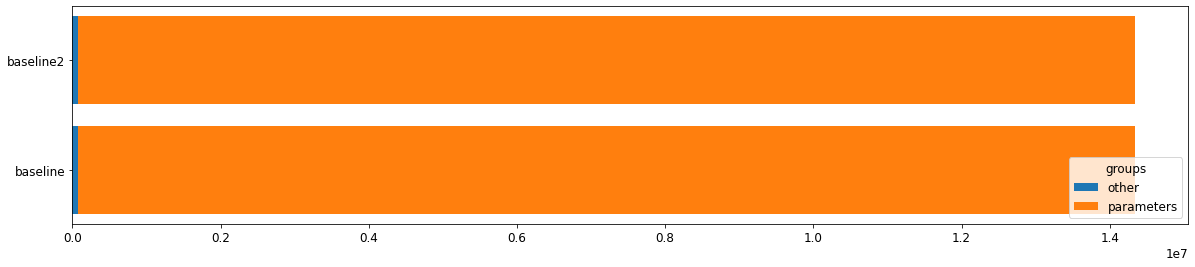

In [20]:
plot_abs_storage_dist(meta_code_params_dict, save_path='./pdfs/storage-dist.pdf')

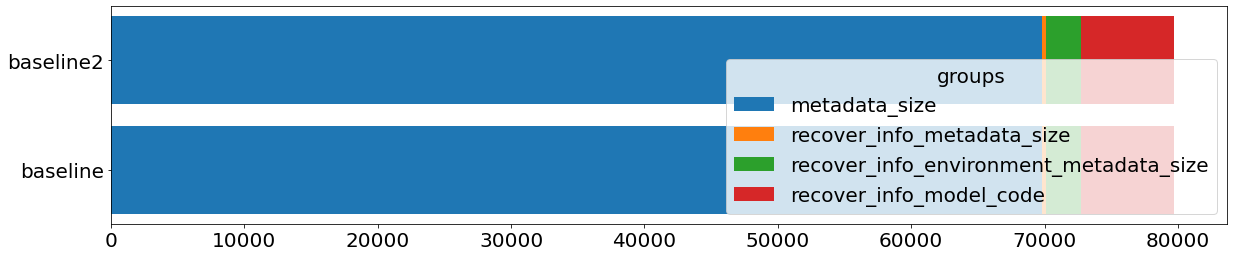

In [21]:
del flat['recover_info_parameters']
flats = {BASELINE: flat, 'baseline2': flat}
plot_abs_storage_dist(flats, save_path='./pdfs/storage-dist.pdf')

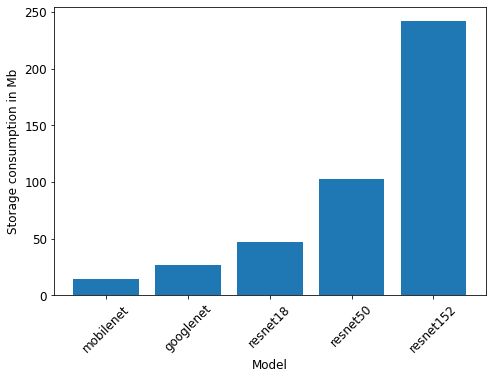

In [22]:
#################################
# All U1 sizes per model
#################################
models = [MOBILENET, GOOGLENET, RESNET_18, RESNET_50, RESNET_152]
u1_sizes = []
for m in models:
    metas = filter_meta(storage_meta, model=m, approach=BASELINE, snapshot_type=VERSION, snapshot_dist='food')
    u1_sizes.append(metas[0][TOTAL_CONSUMPTIONS][U_1] * 10**-6 )

def plot_storage_distribution(x_data, y_data, save_path=None):
    plt.rc('font', size=12)
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(x_data, y_data)
    ax.set_ylabel('Storage consumption in Mb')
    ax.set_xlabel('Model')
    plt.xticks(rotation=45)
    if save_path:
        fig.savefig(save_path, bbox_inches='tight')

    plt.show()


plot_storage_distribution(models, u1_sizes)

In [23]:
#################################
# Plots for parameter update approach
#################################

In [24]:
# We can see that for model versions all layers change
# Thus, the parameter update is the full parameter dict and we do not save
# Only thing we save (bigger distance between U1 and following)
# Reason: For parameter updates we do not save the environment and the code, and class name
# (for this we refer to the base model -- U1)

# TODO if we maybe also save some tiny layers:
# I THINK I HAVE SEEN something like dropout or so

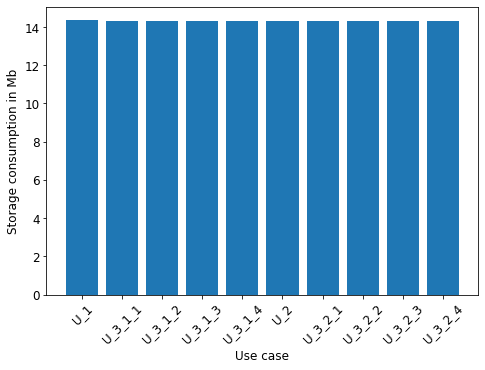

{'U_1': 14345728.0, 'U_3_1_1': 14336054.0, 'U_3_1_2': 14336054.0, 'U_3_1_3': 14336054.0, 'U_3_1_4': 14336054.0, 'U_2': 14336054.0, 'U_3_2_1': 14336054.0, 'U_3_2_2': 14336054.0, 'U_3_2_3': 14336054.0, 'U_3_2_4': 14336054.0}


In [25]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-mobilenet-version-food.pdf')

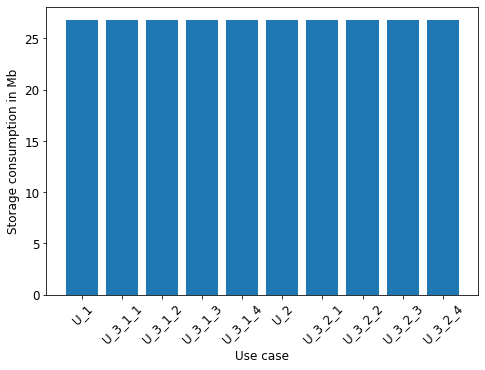

{'U_1': 26769975.0, 'U_3_1_1': 26758694.0, 'U_3_1_2': 26758694.0, 'U_3_1_3': 26758694.0, 'U_3_1_4': 26758694.0, 'U_2': 26758694.0, 'U_3_2_1': 26758694.0, 'U_3_2_2': 26758694.0, 'U_3_2_3': 26758694.0, 'U_3_2_4': 26758694.0}


In [26]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-googlenet-version-food.pdf')

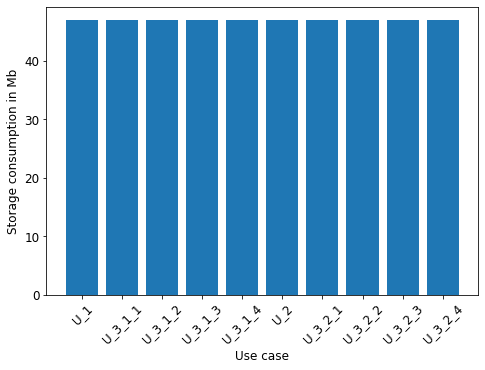

{'U_1': 46873903.0, 'U_3_1_1': 46864306.0, 'U_3_1_2': 46864306.0, 'U_3_1_3': 46864306.0, 'U_3_1_4': 46864306.0, 'U_2': 46864306.0, 'U_3_2_1': 46864306.0, 'U_3_2_2': 46864306.0, 'U_3_2_3': 46864306.0, 'U_3_2_4': 46864306.0}


In [27]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet18-version-food.pdf')

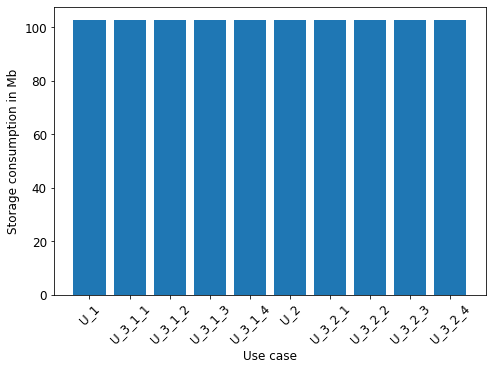

{'U_1': 102627679.0, 'U_3_1_1': 102617580.0, 'U_3_1_2': 102617580.0, 'U_3_1_3': 102617580.0, 'U_3_1_4': 102617580.0, 'U_2': 102617580.0, 'U_3_2_1': 102617580.0, 'U_3_2_2': 102617580.0, 'U_3_2_3': 102617580.0, 'U_3_2_4': 102617580.0}


In [28]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet50-version-food.pdf')

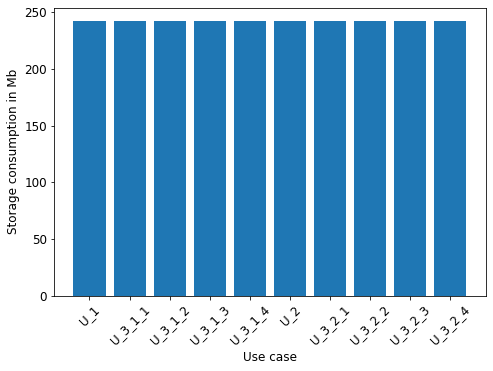

{'U_1': 241902565.0, 'U_3_1_1': 241892452.0, 'U_3_1_2': 241892452.0, 'U_3_1_3': 241892452.0, 'U_3_1_4': 241892452.0, 'U_2': 241892452.0, 'U_3_2_1': 241892452.0, 'U_3_2_2': 241892452.0, 'U_3_2_3': 241892452.0, 'U_3_2_4': 241892452.0}


In [29]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=VERSION, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet152-version-food.pdf')

In [30]:
# But for fine-tuned models we can see a significant improvement


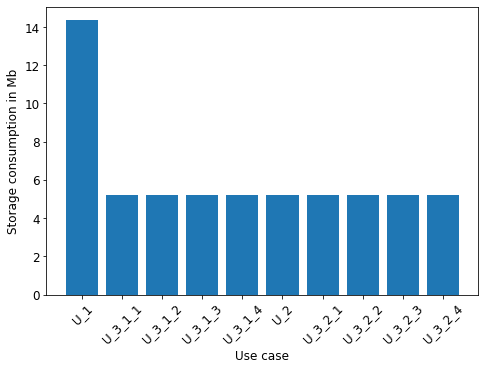

{'U_1': 14345728.0, 'U_3_1_1': 5202622.0, 'U_3_1_2': 5202622.0, 'U_3_1_3': 5202622.0, 'U_3_1_4': 5202622.0, 'U_2': 5202622.0, 'U_3_2_1': 5202622.0, 'U_3_2_2': 5202622.0, 'U_3_2_3': 5202622.0, 'U_3_2_4': 5202622.0}


In [31]:
metas = filter_meta(storage_meta, model=MOBILENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-mobilenet-version-food.pdf')

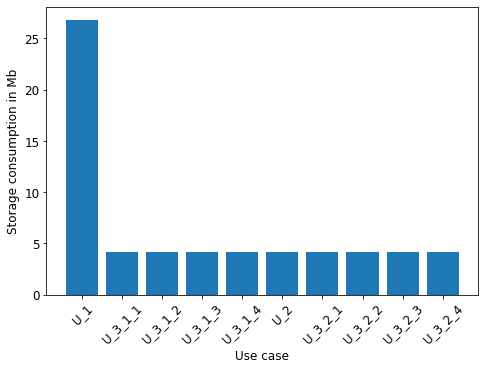

{'U_1': 26769975.0, 'U_3_1_1': 4188064.0, 'U_3_1_2': 4188064.0, 'U_3_1_3': 4188064.0, 'U_3_1_4': 4188064.0, 'U_2': 4188064.0, 'U_3_2_1': 4188064.0, 'U_3_2_2': 4188064.0, 'U_3_2_3': 4188064.0, 'U_3_2_4': 4188064.0}


In [32]:
metas = filter_meta(storage_meta, model=GOOGLENET, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-googlenet-version-food.pdf')

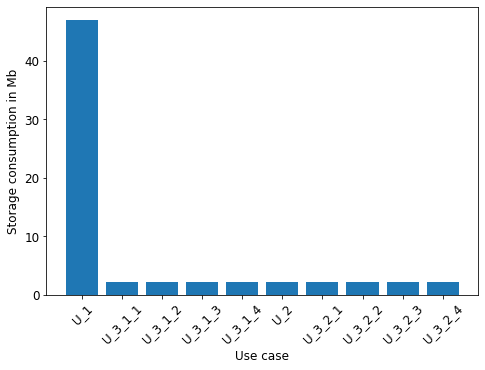

{'U_1': 46873903.0, 'U_3_1_1': 2081594.0, 'U_3_1_2': 2081594.0, 'U_3_1_3': 2081594.0, 'U_3_1_4': 2081594.0, 'U_2': 2081594.0, 'U_3_2_1': 2081594.0, 'U_3_2_2': 2081594.0, 'U_3_2_3': 2081594.0, 'U_3_2_4': 2081594.0}


In [33]:
metas = filter_meta(storage_meta, model=RESNET_18, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet18-version-food.pdf')

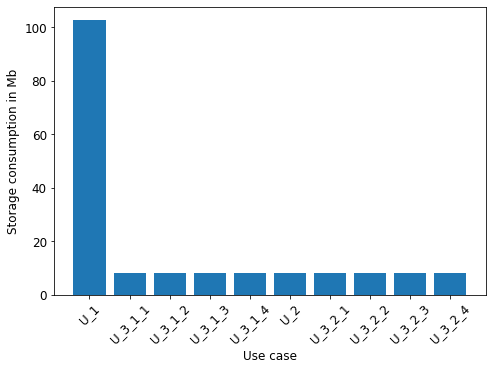

{'U_1': 102627679.0, 'U_3_1_1': 8270974.0, 'U_3_1_2': 8270974.0, 'U_3_1_3': 8270974.0, 'U_3_1_4': 8270974.0, 'U_2': 8270974.0, 'U_3_2_1': 8270974.0, 'U_3_2_2': 8270974.0, 'U_3_2_3': 8270974.0, 'U_3_2_4': 8270974.0}


In [34]:
metas = filter_meta(storage_meta, model=RESNET_50, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet50-version-food.pdf')

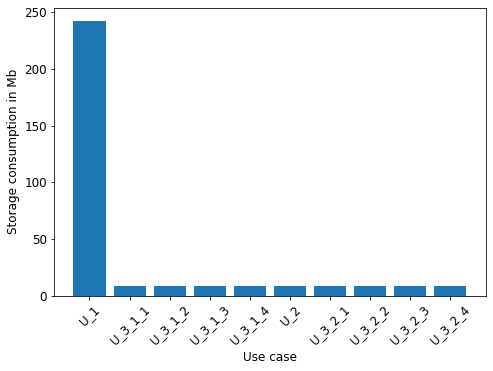

{'U_1': 241902565.0, 'U_3_1_1': 8412914.0, 'U_3_1_2': 8412914.0, 'U_3_1_3': 8412914.0, 'U_3_1_4': 8412914.0, 'U_2': 8412914.0, 'U_3_2_1': 8412914.0, 'U_3_2_2': 8412914.0, 'U_3_2_3': 8412914.0, 'U_3_2_4': 8412914.0}


In [35]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet152-version-food.pdf')

In [36]:
# The improved parameter update approach has no impact on the storage consumption
# It only influences the computation time for saving models

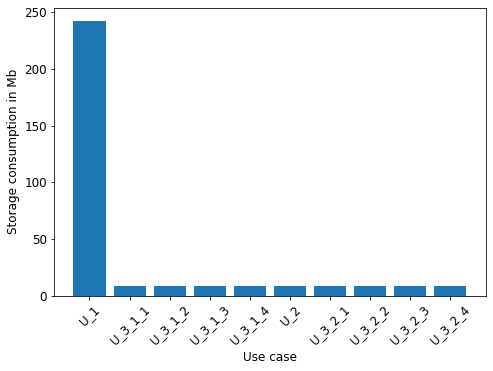

{'U_1': 241902565.0, 'U_3_1_1': 8399218.0, 'U_3_1_2': 8399218.0, 'U_3_1_3': 8399218.0, 'U_3_1_4': 8399218.0, 'U_2': 8399218.0, 'U_3_2_1': 8399218.0, 'U_3_2_2': 8399218.0, 'U_3_2_3': 8399218.0, 'U_3_2_4': 8399218.0}


In [37]:
metas = filter_meta(storage_meta, model=RESNET_152, approach=PARAM_UPDATE_IMPROVED, snapshot_type=FINE_TUNED, snapshot_dist='food')
plot_median_storage_consumption(metas, save_path='./pdfs/median-storage-baseline-resnet152-version-food.pdf')


In [38]:
#################################
# Storage consumption is only dependent on the used model
# To show: plot mobilenet storage consumptions with different snapshot_type and snapshot_dist
#################################


In [39]:
ROOT_LOG_DIR = '/Users/nils/Downloads/log-dir-with-first-try-prov/'
all_files = all_files_in_dir(ROOT_LOG_DIR)

server_files = [f for f in all_files if 'server' in f]

In [40]:
server_files_and_meta = [(extract_file_meta(f), f) for f in server_files]

In [41]:
server_files_and_meta = [({**f[0], **{'u_ids': use_case_ids(f[1])}}, f[1]) for f in server_files_and_meta]

In [42]:
storage_meta = []
for f in server_files_and_meta:
    use_case_id_dict = f[0]['u_ids']
    consumptions = {}
    total_consumptions = {}
    for use_case in use_case_id_dict.keys():
        s_info = storage_info(f[1], use_case_id_dict[use_case])
        consumptions[use_case] = s_info
        total_consumptions[use_case] = total_storage_consumption(s_info)

    f[0].update({CONSUMPTIONS: consumptions, TOTAL_CONSUMPTIONS: total_consumptions})
    storage_meta.append(f[0])

TypeError: list indices must be integers or slices, not str

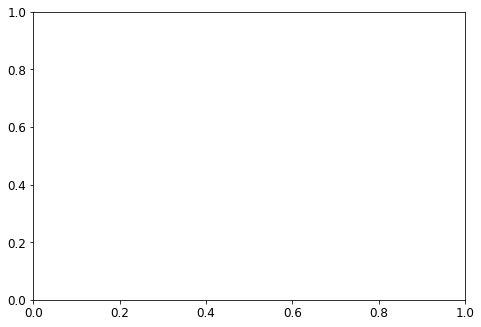

In [43]:
c = filter_meta(storage_meta, model=RESNET_152, approach='param_update_improved', snapshot_type=VERSION, snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c, ignore_use_cases=[U_2, U_1])

In [ ]:
c = filter_meta(storage_meta, model=RESNET_152, approach='provenance', snapshot_type=VERSION, snapshot_dist='food',
                run='0')
plot_single_storage_consumption(c, ignore_use_cases=[U_2, U_1])

